 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [270]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns  
import matplotlib.pyplot as plt 

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [271]:
# Reading whale returns
whale_data = pd.read_csv('../Whale-Portfolio-Analysis/whale_returns.csv', parse_dates=True, infer_datetime_format=True, index_col="Date")
whale_data.sort_index(ascending=False,inplace=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848


In [272]:
# Count nulls
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [273]:
# Drop nulls
whale_returns = whale_data.dropna().copy()
col_names = ["SOROS", "PAULSON", "TIGER GLOBAL", "BERKSHIRE HATHAWAY"]
whale_returns.columns = col_names
whale_returns.sort_index(ascending=True, inplace=True)
whale_returns.head()

,SOROS,PAULSON,TIGER GLOBAL,BERKSHIRE HATHAWAY
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [274]:
# Reading algorithmic returns
algo_data = pd.read_csv('../Whale-Portfolio-Analysis/algo_returns.csv', parse_dates=True, infer_datetime_format=True, index_col="Date")
algo_returns = algo_data.rename(columns={"Algo 1":"ALGO 1", "Algo 2":"ALGO 2"})
algo_returns.sort_index(ascending=True,inplace=True)
algo_returns.head()

,ALGO 1,ALGO 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [275]:
# Count nulls
algo_returns.isnull().sum()

ALGO 1    0
ALGO 2    6
dtype: int64

In [276]:
# Drop nulls
algo_returns = algo_returns.dropna().copy()
algo_returns.isnull().sum()
algo_returns.head()

,ALGO 1,ALGO 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [277]:
# Reading S&P 500 Closing Prices
sp500_data = pd.read_csv('../Whale-Portfolio-Analysis/sp500_history.csv', parse_dates=True, infer_datetime_format=True, index_col="Date")
sp500_data.sort_index(ascending=True, inplace=True)
sp500_data.head()

,Close
Date,
2012-10-01,"$1,444.49"
2012-10-02,"$1,445.75"
2012-10-03,"$1,450.99"
2012-10-04,"$1,461.40"
2012-10-05,"$1,460.93"


In [278]:
# Check Data Types
sp500_data.dtypes

Close    object
dtype: object

In [279]:
# Fix Data Types
sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data["Close"] = sp500_data["Close"].str.replace(",", "")
sp500_data["Close"] = sp500_data["Close"].astype("float")
sp500_data.dtypes

C:\Users\altma\AppData\Local\Temp/ipykernel_26392/2742832925.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")


Close    float64
dtype: object

In [280]:
# Calculate Daily Returns
sp500_returns = sp500_data.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [281]:
# Drop nulls
sp500_returns = sp500_returns.dropna().copy()
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [282]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close":"S&P 500"})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [315]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([sp500_returns, whale_returns, algo_returns], axis='columns', join='inner')
daily_returns.sort_index(ascending=True, inplace=True)
daily_returns.tail()

,S&P 500,SOROS,PAULSON,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2
Date,,,,,,,
2019-04-16,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-18,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-22,0.001012,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-23,0.008841,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns Algo 2 Portfolio vs. S&P 500'}, xlabel='Date'>

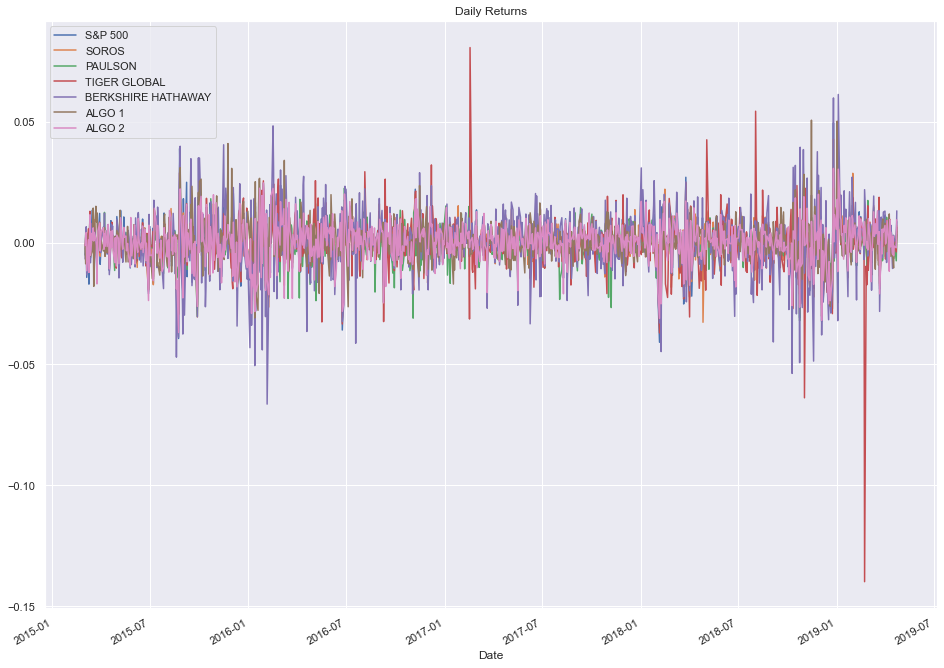

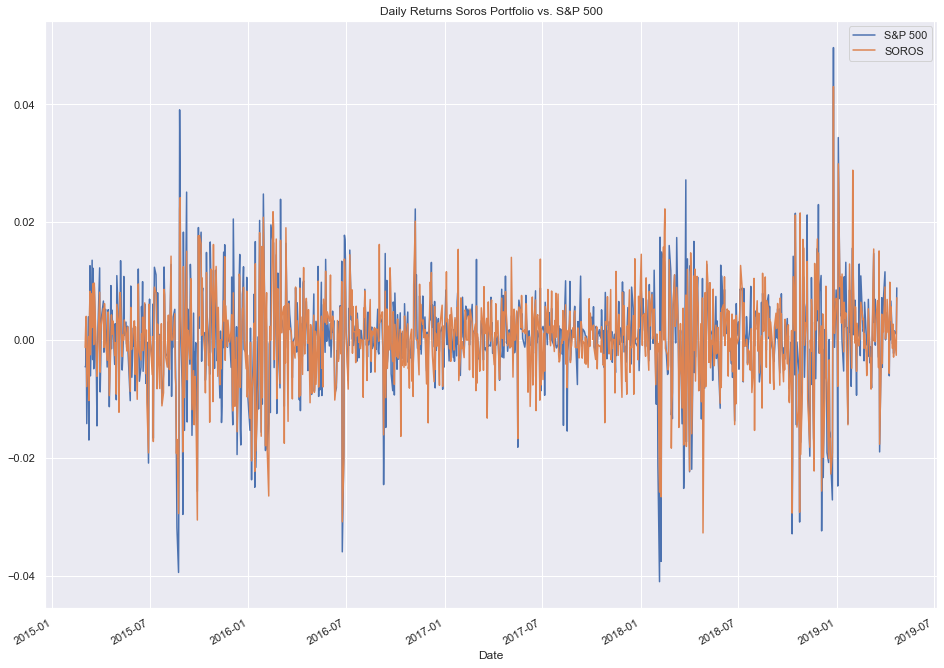

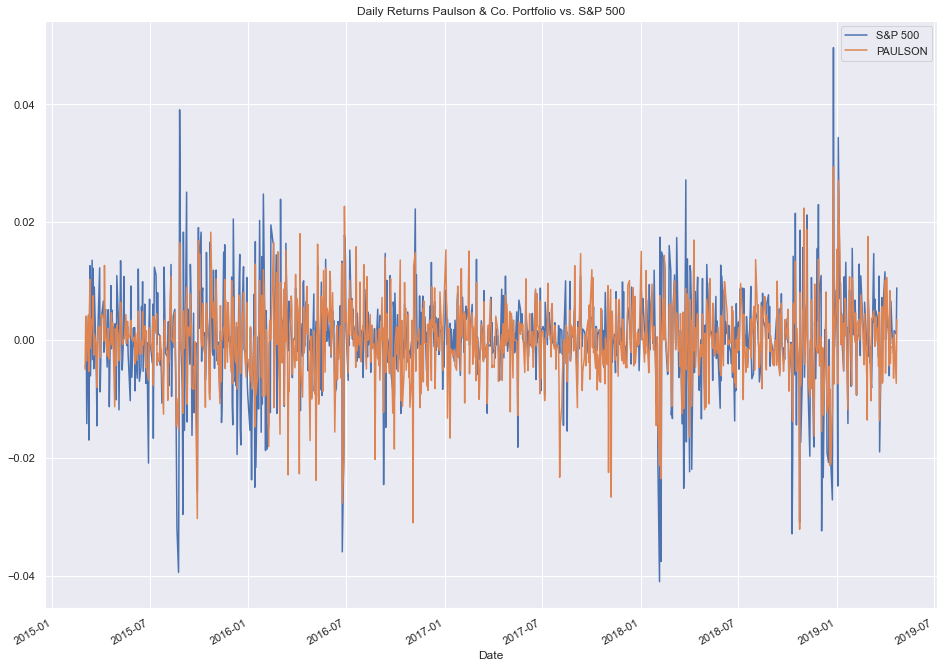

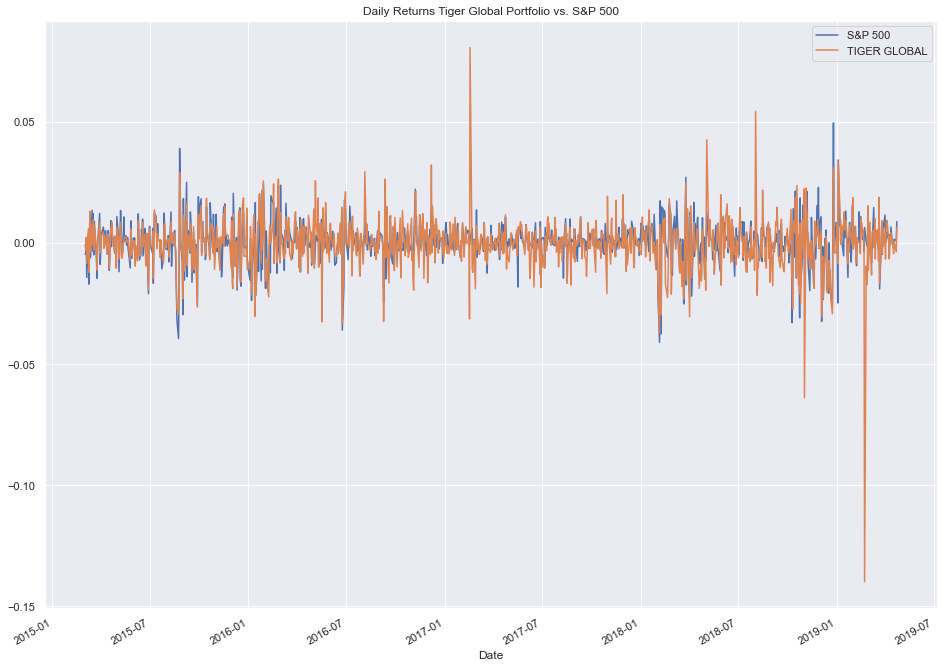

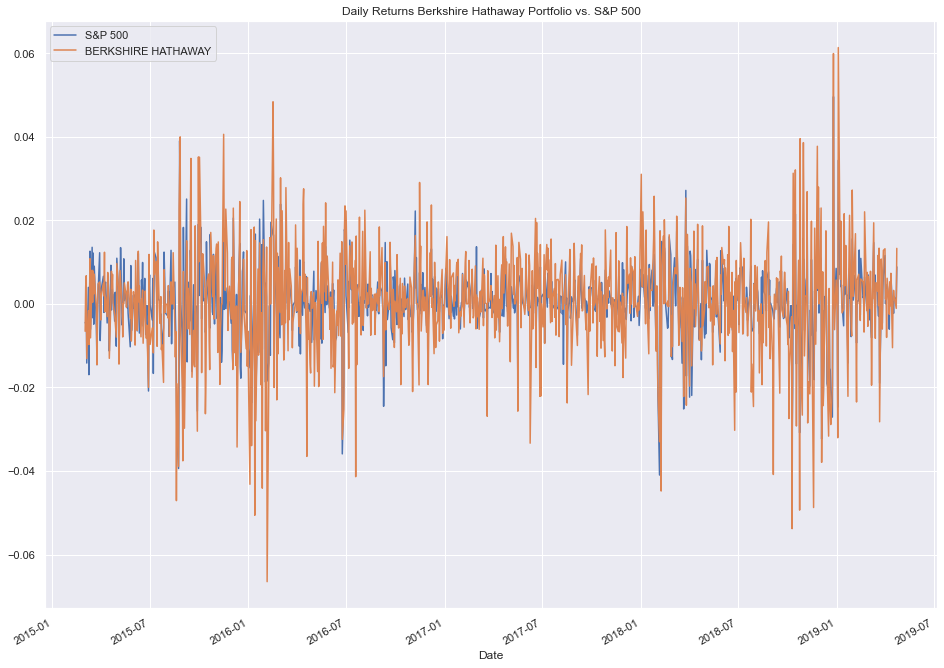

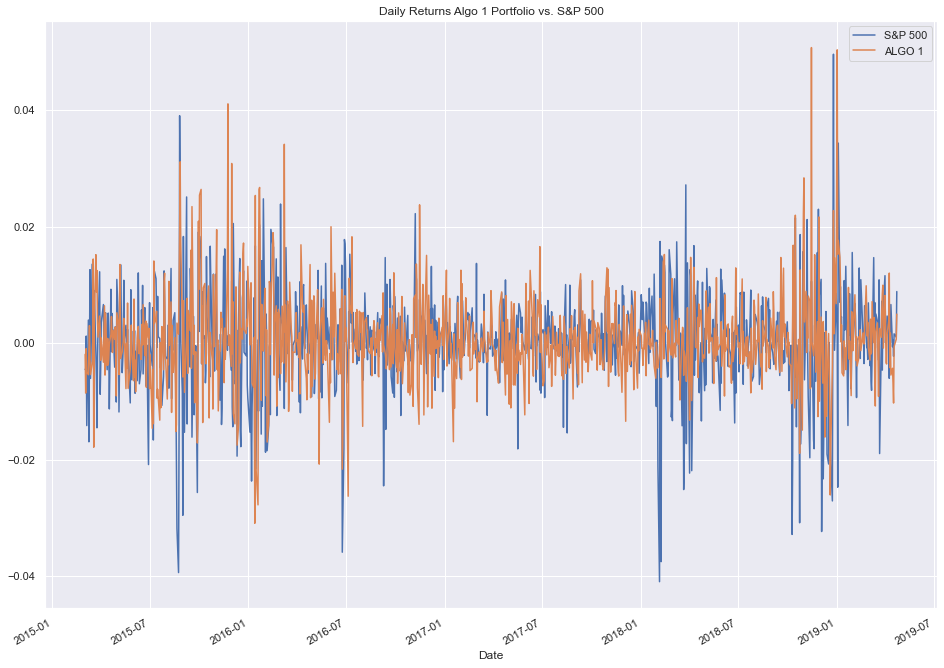

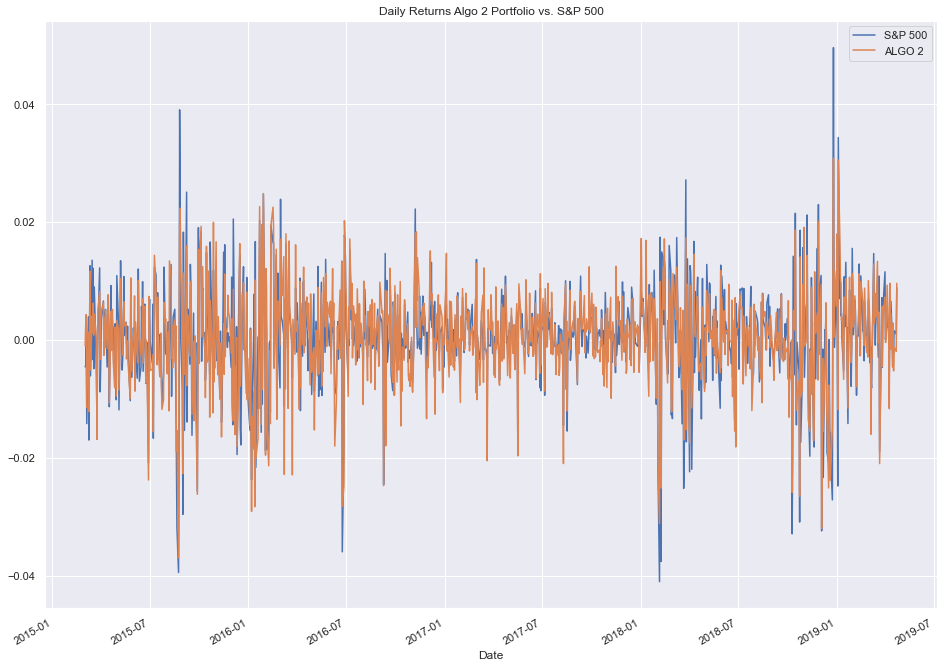

In [284]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(16,12),title="Daily Returns")
daily_returns[["S&P 500","SOROS"]].plot(figsize=(16,12),title="Daily Returns Soros Portfolio vs. S&P 500")
daily_returns[["S&P 500","PAULSON"]].plot(figsize=(16,12),title="Daily Returns Paulson & Co. Portfolio vs. S&P 500")
daily_returns[["S&P 500","TIGER GLOBAL"]].plot(figsize=(16,12),title="Daily Returns Tiger Global Portfolio vs. S&P 500")
daily_returns[["S&P 500","BERKSHIRE HATHAWAY"]].plot(figsize=(16,12),title="Daily Returns Berkshire Hathaway Portfolio vs. S&P 500")
daily_returns[["S&P 500","ALGO 1"]].plot(figsize=(16,12),title="Daily Returns Algo 1 Portfolio vs. S&P 500")
daily_returns[["S&P 500","ALGO 2"]].plot(figsize=(16,12),title="Daily Returns Algo 2 Portfolio vs. S&P 500")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

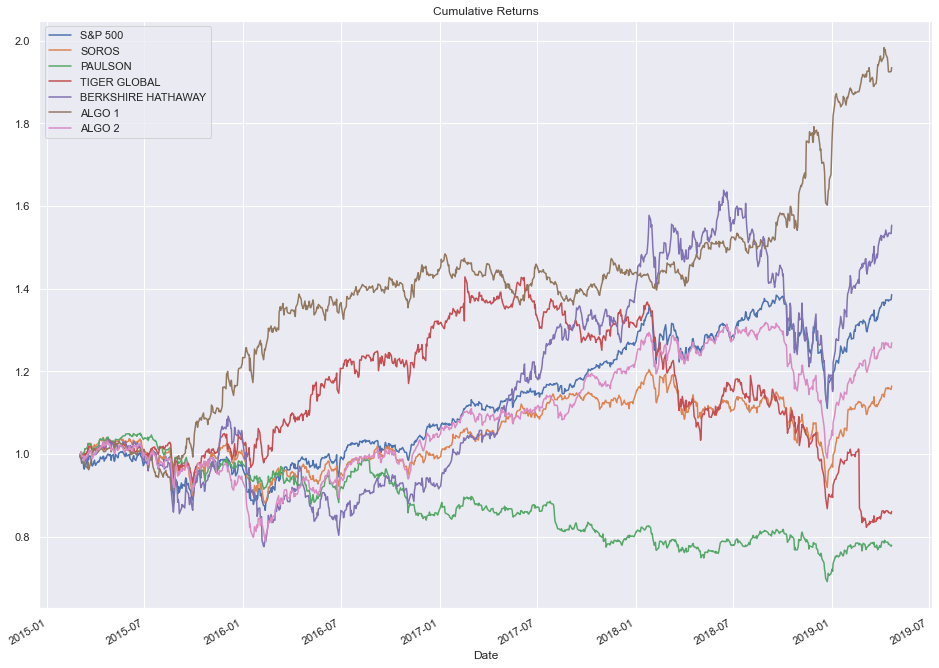

In [285]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + daily_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(16,12), title="Cumulative Returns")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Daily Returns Spread'}>

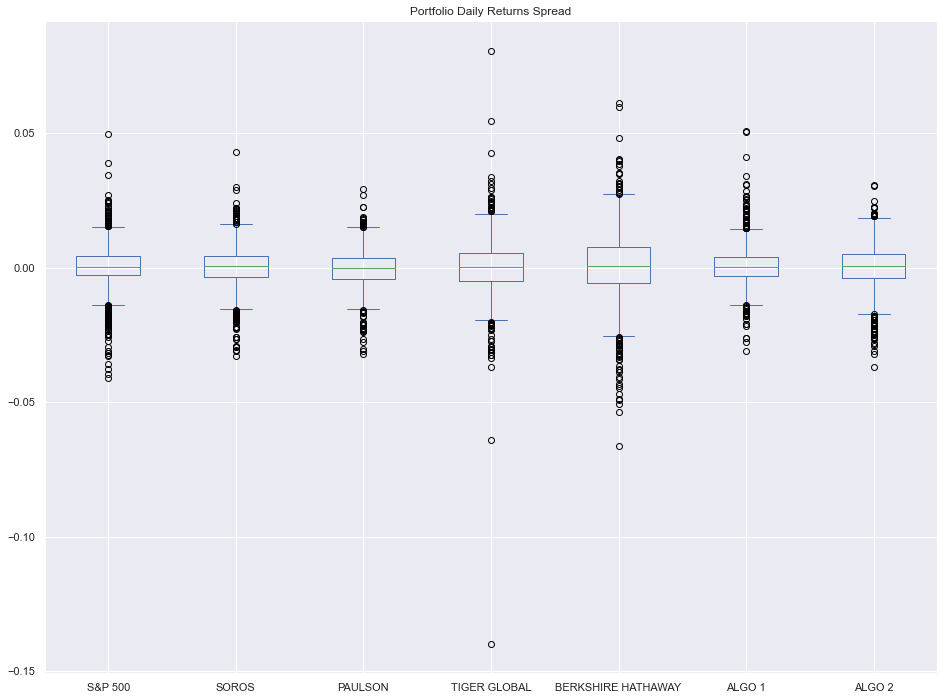

In [286]:
# Box plot to visually show risk
daily_returns.plot(kind='box',figsize=(16,12), title="Portfolio Daily Returns Spread")

### Calculate Standard Deviations

In [287]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()
daily_std

S&P 500               0.008554
SOROS                 0.007895
PAULSON               0.007023
TIGER GLOBAL          0.010894
BERKSHIRE HATHAWAY    0.012919
ALGO 1                0.007620
ALGO 2                0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [288]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY    0.012919
TIGER GLOBAL          0.010894
S&P 500               0.008554
ALGO 2                0.008342
SOROS                 0.007895
ALGO 1                0.007620
PAULSON               0.007023
dtype: float64

# Portfolio Risk
Based on the results above, the returns of the Tiger Global Management and Berkshire Hathaway portfolios have a higher standard deviation than that of the S&P 500 over the same period. As such, we can say from the samples that these portfolios are riskier than the index. 

### Calculate the Annualized Standard Deviation

In [289]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY    0.205077
TIGER GLOBAL          0.172936
S&P 500               0.135786
ALGO 2                0.132430
SOROS                 0.125335
ALGO 1                0.120967
PAULSON               0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of Portfolio Returns'}, xlabel='Date'>

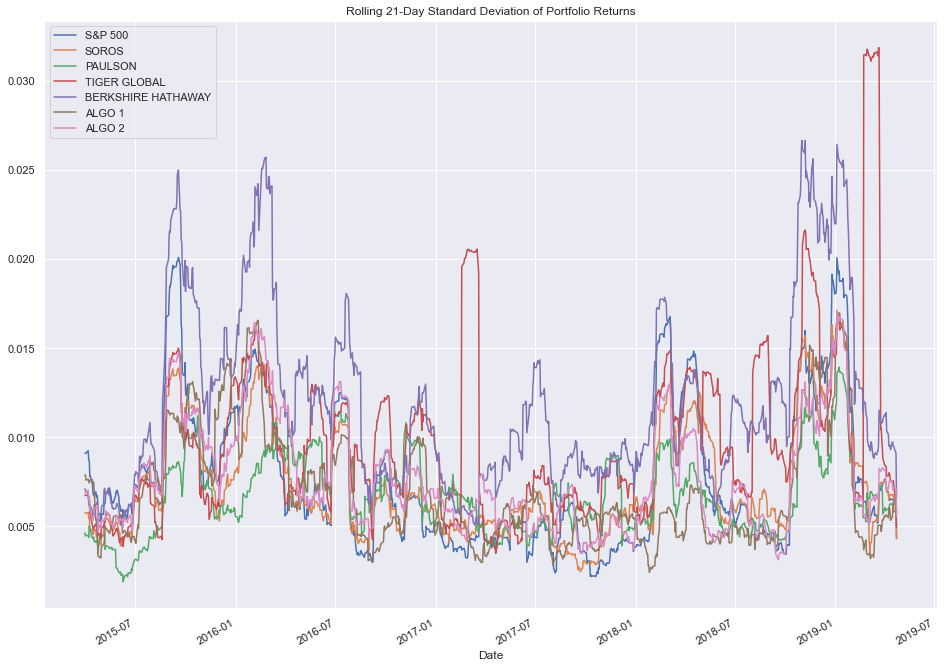

In [290]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = daily_returns.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21.plot(figsize=(16,12), title="Rolling 21-Day Standard Deviation of Portfolio Returns")

### Calculate and plot the correlation

<AxesSubplot:>

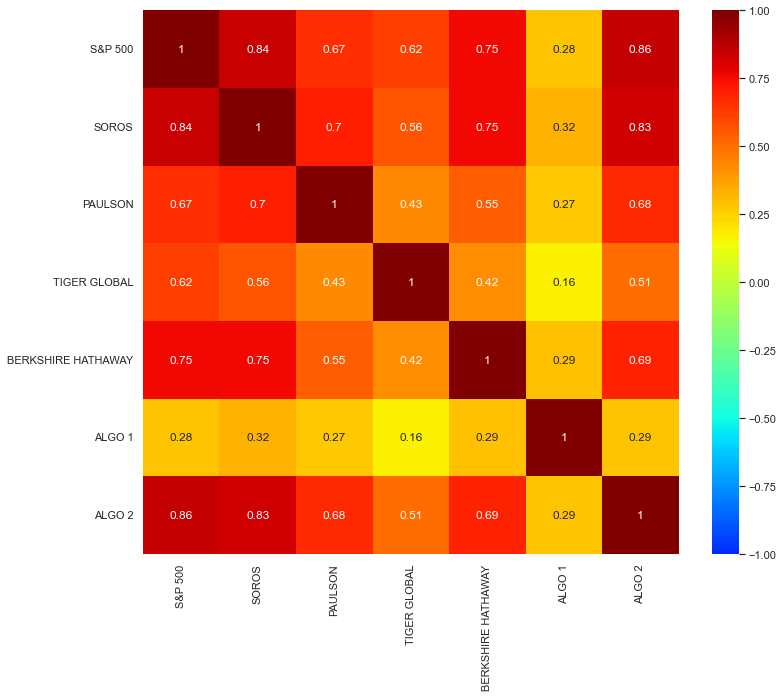

In [318]:
# Calculate the correlation
returns_corr = daily_returns.corr()

# Display the correlation matrix
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(returns_corr, vmin=-1, vmax=1, annot=True, cmap="jet", center=-0.2)


In [292]:
# Sum total correlation for each portfolio
returns_corr.sum(axis=0).sort_values(ascending=False)

S&P 500               5.021171
SOROS                 5.001465
ALGO 2                4.847528
BERKSHIRE HATHAWAY    4.455893
PAULSON               4.296740
TIGER GLOBAL          3.715893
ALGO 1                2.614209
dtype: float64

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [293]:
# Calculate covariance of a single portfolio
tiger_cov = daily_returns["TIGER GLOBAL"].cov(daily_returns["S&P 500"])
tiger_cov

5.814183076499326e-05

In [294]:
# Calculate variance of S&P 500
sp500_var = daily_returns["S&P 500"].var()
sp500_var

7.316632424648712e-05

In [295]:
# Computing beta
tiger_beta = tiger_cov / sp500_var
tiger_beta

0.7946528866083468

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Tiger Global Management Portfolio'}, xlabel='Date'>

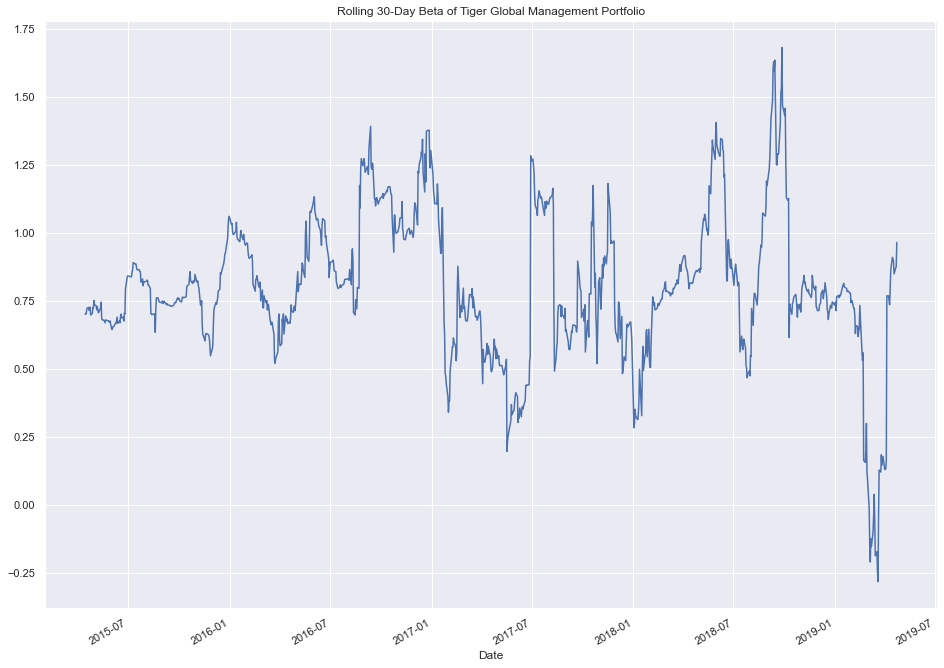

In [296]:
# Plot beta trend
rolling_covariance = daily_returns["TIGER GLOBAL"].rolling(window=30).cov(daily_returns["S&P 500"])
rolling_variance = daily_returns["S&P 500"].rolling(window=30).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(16,12), title="Rolling 30-Day Beta of Tiger Global Management Portfolio")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [343]:
# Use `ewm` to calculate the rolling window
daily_ewm_std = daily_returns.ewm(halflife=21).std()
daily_ewm_std


,S&P 500,SOROS,PAULSON,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.000106,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380
2015-03-05,0.003294,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662
2015-03-06,0.006498,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166
2015-03-09,0.007083,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290
...,...,...,...,...,...,...,...
2019-04-16,0.007837,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938
2019-04-17,0.007736,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896
2019-04-18,0.007610,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [319]:
# Annualized Sharpe Ratios
ann_sharpe_ratios = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))
ann_sharpe_ratios.sort_values(ascending=False)

ALGO 1                1.378649
S&P 500               0.648267
BERKSHIRE HATHAWAY    0.621810
ALGO 2                0.501364
SOROS                 0.356417
TIGER GLOBAL         -0.121060
PAULSON              -0.483570
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

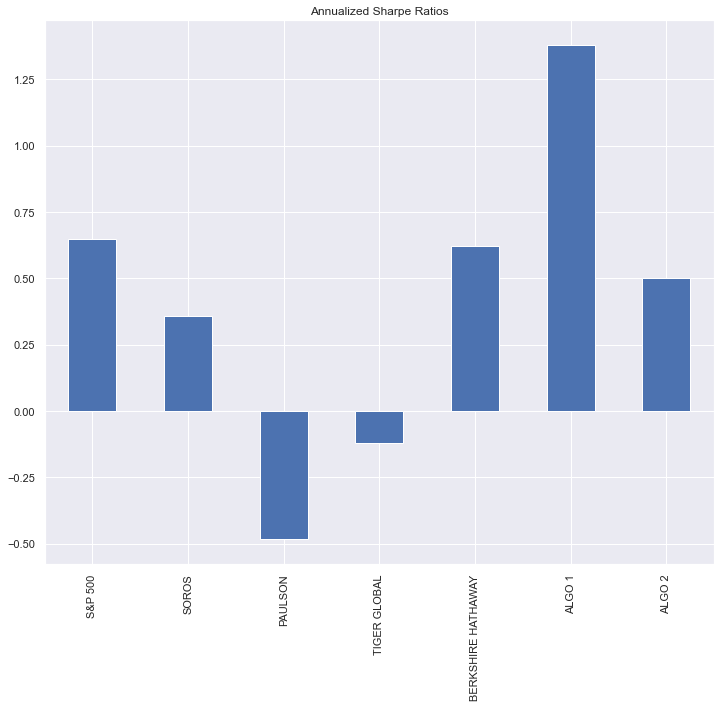

In [299]:
# Visualize the sharpe ratios as a bar plot
ann_sharpe_ratios.plot(kind="bar",title="Annualized Sharpe Ratios")

## Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

### Portfolio Performance Based on Sharpe Ratios
The calculations and plot above inform us of the sharpe ratios, or returns per unit risk, of each portfolio. Based on this, we can see that Algo 1 outperforms both the S&P 500 as well as all of the whales' portfolios. Algo 2 outperforms all of the whales' portfolios except Berkshire Hathaway and is also outperformed by the S&P 500 and Algo 1.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [324]:
# Reading data from 1st stock
abt_data = pd.read_csv('../Whale-Portfolio-Analysis/abbott_prices.csv', parse_dates=True, infer_datetime_format=True)
abt_data['Date'] = pd.to_datetime(abt_data['Date']).dt.date
abt_data.set_index('Date',inplace=True)
abt_data.sort_index(ascending=True, inplace=True)
abt_data.rename(columns={"Close":"ABT"},inplace=True)
abt_data.head()

,ABT
Date,
2015-03-10,46.17
2015-03-11,46.30
2015-03-12,47.25
2015-03-13,46.88
2015-03-16,47.83


In [325]:
# Reading data from 2nd stock
amzn_data = pd.read_csv('../Whale-Portfolio-Analysis/amazon_prices.csv', parse_dates=True, infer_datetime_format=True)
amzn_data['Date'] = pd.to_datetime(amzn_data['Date']).dt.date
amzn_data.set_index('Date',inplace=True)
amzn_data.sort_index(ascending=True, inplace=True)
amzn_data.rename(columns={"Close":"AMZN"}, inplace=True)
amzn_data.head()

,AMZN
Date,
2015-03-10,369.51
2015-03-11,366.37
2015-03-12,374.24
2015-03-13,370.58
2015-03-16,373.35


In [326]:
# Reading data from 3rd stock
aapl_data = pd.read_csv('../Whale-Portfolio-Analysis/apple_prices.csv', parse_dates=True, infer_datetime_format=True)
aapl_data['Date'] = pd.to_datetime(aapl_data['Date']).dt.date
aapl_data.set_index('Date',inplace=True)
aapl_data.sort_index(ascending=True, inplace=True)
aapl_data.rename(columns={"Close":"AAPL"}, inplace=True)
aapl_data.head()

,AAPL
Date,
2015-03-10,31.13
2015-03-11,30.56
2015-03-12,31.11
2015-03-13,30.90
2015-03-16,31.24


In [327]:
# Combine all stocks in a single DataFrame
portfolio_data = pd.concat([abt_data,amzn_data,aapl_data], axis="columns", join="inner")
portfolio_data.head()

,ABT,AMZN,AAPL
Date,,,
2015-03-10,46.17,369.51,31.13
2015-03-11,46.30,366.37,30.56
2015-03-12,47.25,374.24,31.11
2015-03-13,46.88,370.58,30.90
2015-03-16,47.83,373.35,31.24


In [328]:
# Calculate daily returns
portfolio_returns = portfolio_data.pct_change()
# Drop NAs
portfolio_returns = portfolio_returns.dropna()
portfolio_returns.isnull().sum()
# Display sample data
portfolio_returns.head()

,ABT,AMZN,AAPL
Date,,,
2015-03-11,0.002816,-0.008498,-0.018310
2015-03-12,0.020518,0.021481,0.017997
2015-03-13,-0.007831,-0.009780,-0.006750
2015-03-16,0.020265,0.007475,0.011003
2015-03-17,-0.015471,-0.003830,0.016645


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [329]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
altman_portfolio_returns = portfolio_returns.dot(weights)

# Display sample data
altman_portfolio_returns = pd.DataFrame(altman_portfolio_returns)
altman_portfolio_returns.columns = ["ALTMAN"]
altman_portfolio_returns.sort_index(ascending=True, inplace=True)
altman_portfolio_returns.tail()

,ALTMAN
Date,
2020-03-03,-0.033031
2020-03-04,0.044679
2020-03-05,-0.025948
2020-03-06,-0.003339
2020-03-09,-0.063252


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [347]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([daily_returns,altman_portfolio_returns], axis="columns", join="outer")
all_returns.sort_index(ascending=True, inplace=True)
all_returns.head()


,S&P 500,SOROS,PAULSON,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,ALTMAN
Date,,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,NaN
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,NaN
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,NaN
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,NaN
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,NaN


In [331]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns = all_returns.dropna()
all_returns.head()

,S&P 500,SOROS,PAULSON,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,ALTMAN
Date,,,,,,,,
2015-03-11,-0.001918,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605,-0.007997
2015-03-12,0.012601,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667,0.019999
2015-03-13,-0.006075,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.008120
2015-03-16,0.013534,0.007901,0.003583,0.007953,0.008055,-0.003395,0.004117,0.012914
2015-03-17,-0.003320,0.002142,0.002928,-0.000687,0.000384,-0.002822,0.001274,-0.000885


In [332]:
# Calculate and plot cumulative returns
all_cumulative_returns = (1 + all_returns).cumprod()
all_cumulative_returns.tail(1)

,S&P 500,SOROS,PAULSON,TIGER GLOBAL,BERKSHIRE HATHAWAY,ALGO 1,ALGO 2,ALTMAN
Date,,,,,,,,
2019-04-23,1.435152,1.179454,0.781526,0.874664,1.58527,1.980396,1.290592,2.550811


<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

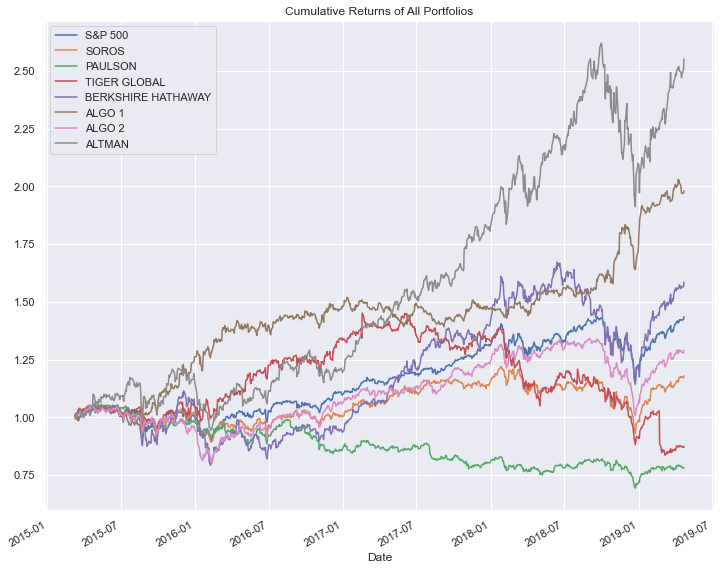

In [339]:
# Plot cumulative returns for all portfolios
all_cumulative_returns.plot(title="Cumulative Returns of All Portfolios")

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [333]:
# Calculate the annualized `std`
all_std = all_returns.std()
all_annualized_std = all_std * np.sqrt(252)
all_annualized_std

S&P 500               0.135667
SOROS                 0.125508
PAULSON               0.111690
TIGER GLOBAL          0.173253
BERKSHIRE HATHAWAY    0.205434
ALGO 1                0.121147
ALGO 2                0.132523
ALTMAN                0.202460
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation of All Portfolios'}, xlabel='Date'>

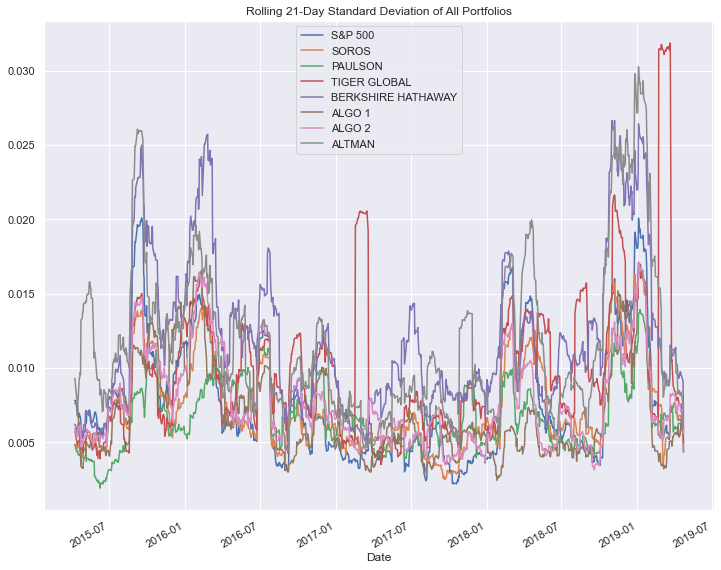

In [334]:
# Calculate rolling standard deviation
all_rolling_std_21 = all_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_rolling_std_21.plot(title="Rolling 21-Day Standard Deviation of All Portfolios")

### Calculate and plot the correlation

<AxesSubplot:>

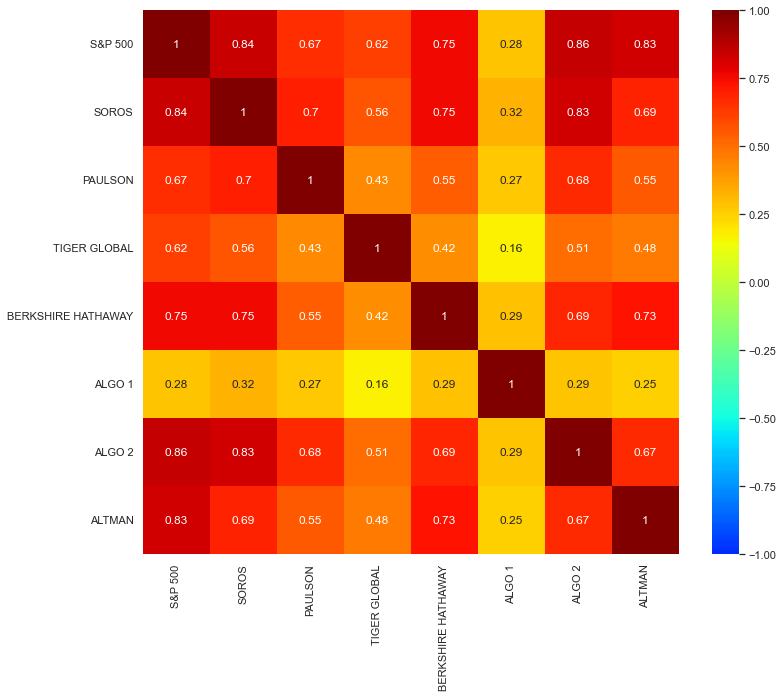

In [335]:
# Calculate and plot the correlation
all_returns_corr = all_returns.corr()

# Display the correlation matrix
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(all_returns_corr, vmin=-1, vmax=1, annot=True, cmap="jet", center=-0.2)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Altman Portfolio'}, xlabel='Date'>

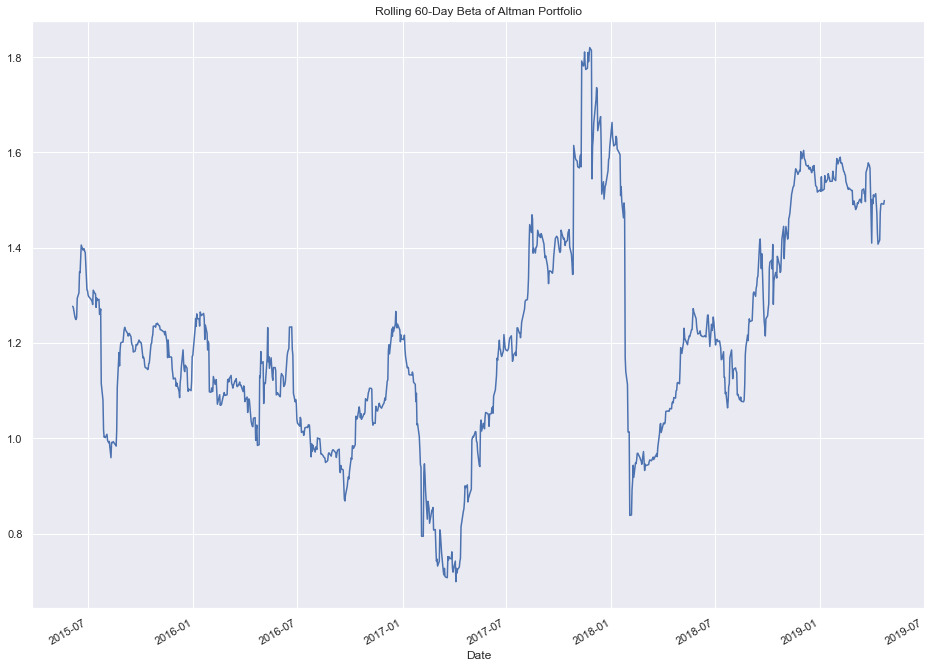

In [336]:
# Calculate and plot Beta
all_rolling_60_cov = all_returns["ALTMAN"].rolling(window=60).cov(all_returns["S&P 500"])
all_rolling_60_var = all_returns["S&P 500"].rolling(window=60).var()
all_rolling_60_beta = all_rolling_60_cov / all_rolling_60_var
all_rolling_60_beta.plot(figsize=(16,12), title="Rolling 60-Day Beta of Altman Portfolio")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [337]:
# Calculate Annualized Sharpe Ratios
all_annualized_sharpe = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
all_annualized_sharpe

S&P 500               0.715143
SOROS                 0.382392
PAULSON              -0.480368
TIGER GLOBAL         -0.099948
BERKSHIRE HATHAWAY    0.648118
ALGO 1                1.431260
ALGO 2                0.534206
ALTMAN                1.225648
dtype: float64

<AxesSubplot:>

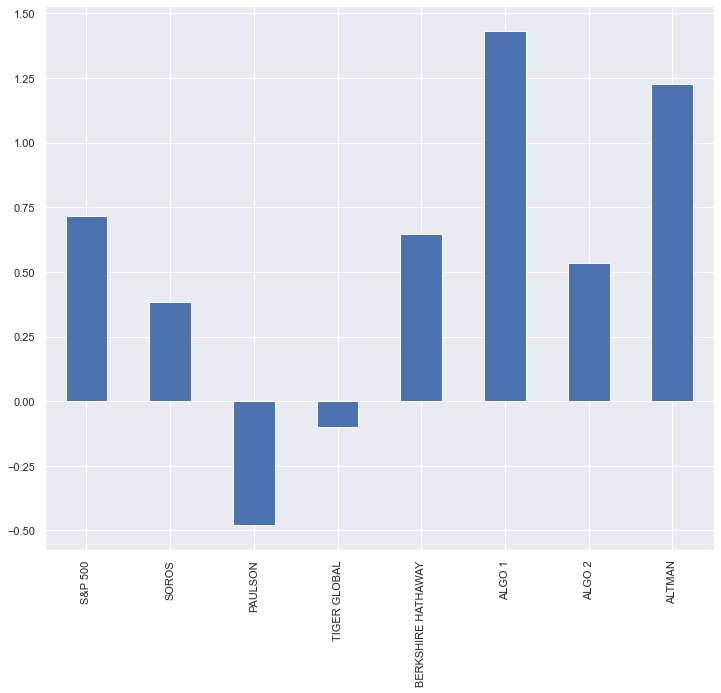

In [338]:
# Visualize the sharpe ratios as a bar plot
all_annualized_sharpe.plot(kind="bar")

## How does your portfolio do?
### Portfolio Result
My portfolio stacks up pretty well in terms of performance. Its sharpe ratio is beat out only by Algo 1; not bad considering the low diversification of only three stocks in two sectors. This tracks given that it has both the highest cumulative returns but also highest standard deviation compared to all other portfolios in this analysis and the S&P over the same period. 
